# Импортирование библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Загрузка датасета и EDA

In [3]:
data = pd.read_csv('Titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Визуализация распределения признаков

Зададим цветовую палитру

In [5]:
sns.set(style="whitegrid")
color_palette = ['#125D98', '#3C99DC', '#F8EDE3']
hue_colors = {1: color_palette[0], 0: color_palette[1]}

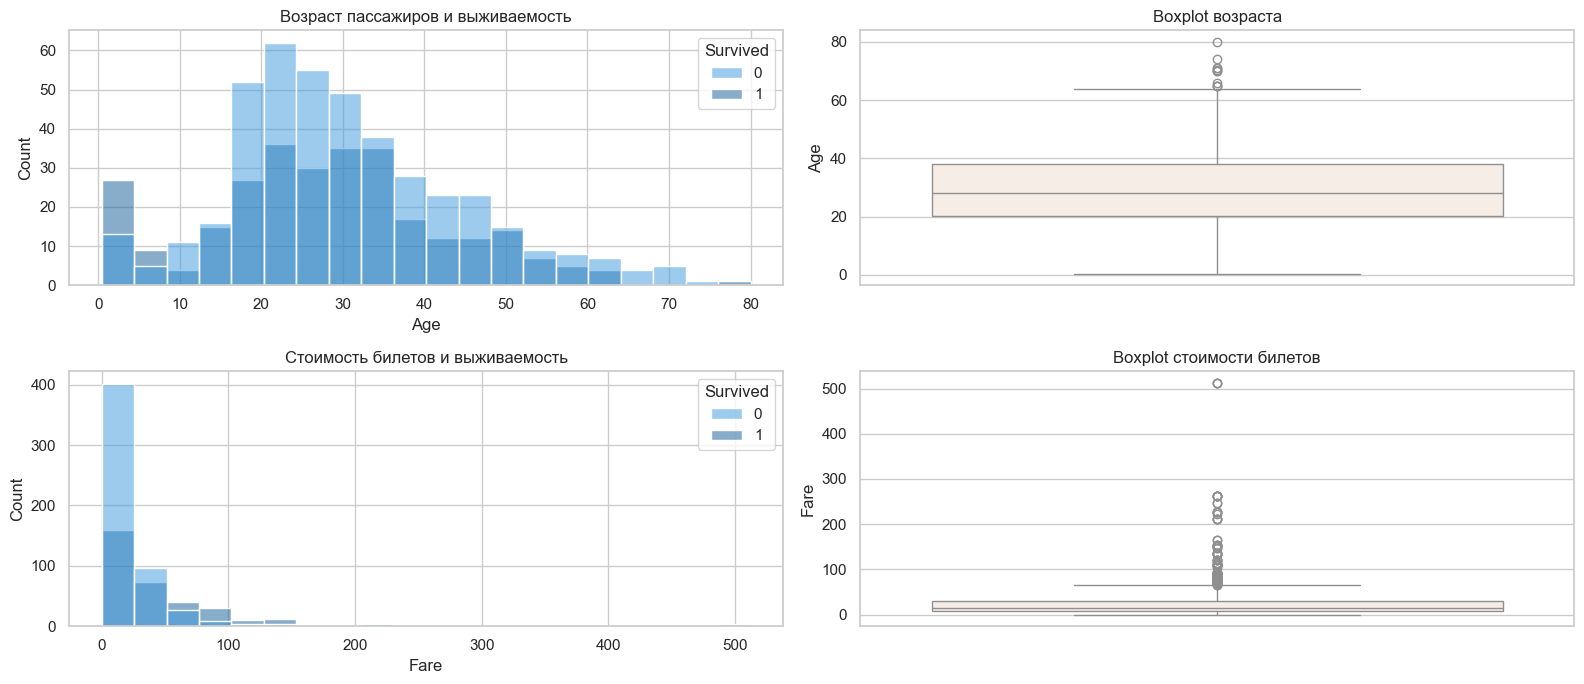

In [6]:
plt.figure(figsize=(16, 7))

plt.subplot(2, 2, 1)
sns.histplot(data=data, x='Age', bins=20, hue='Survived', palette=hue_colors)
plt.title('Возраст пассажиров и выживаемость')

plt.subplot(2, 2, 2)
sns.boxplot(data['Age'], color=color_palette[2])
plt.title('Boxplot возраста')

plt.subplot(2, 2, 3)
sns.histplot(data=data, x='Fare', bins=20, hue='Survived', palette=hue_colors)
plt.title('Стоимость билетов и выживаемость')

plt.subplot(2, 2, 4)
sns.boxplot(data['Fare'], color=color_palette[2])
plt.title('Boxplot стоимости билетов')

plt.tight_layout()
plt.show()

### 1. Графики распределения возраста:
- **Гистограмма возраста** показывает, что молодые пассажиры (особенно в возрасте до 30 лет) составляли большую часть выборки. Среди них есть как выжившие, так и погибшие, однако процент выживших кажется выше среди детей и подростков, что может свидетельствовать о приоритете спасения детей.
- **Boxplot возраста** подтверждает, что медианный возраст пассажиров находится примерно между 20 и 30 годами. Также наблюдаются выбросы среди пожилых пассажиров (в возрасте 60 лет и старше). Выжившие распределены преимущественно среди более молодых групп, в то время как пожилые пассажиры имеют меньший шанс на выживание.

### 2. Графики распределения стоимости билета (Fare):
- **Гистограмма стоимости билета** демонстрирует, что большинство пассажиров имели билеты с низкой стоимостью (ниже 100 единиц). Среди пассажиров с более высокими значениями Fare (от 100 и выше) выживаемость выше, что может указывать на корреляцию между классом обслуживания и шансами на спасение.
- **Boxplot стоимости билета** показывает значительное количество выбросов среди высоких значений. Это указывает на то, что некоторые пассажиры купили дорогие билеты, что может быть связано с более высоким классом обслуживания и, как следствие, с большей вероятностью выживания.

### Заключение:
- Молодой возраст и высокая стоимость билета положительно коррелируют с выживаемостью. Вероятно, дети и пассажиры в более высоком классе имели преимущество при спасении.
- Пожилые пассажиры и пассажиры с дешевыми билетами имели меньший шанс на выживание, что может указывать на социальные или экономические приоритеты при эвакуации.

Эти наблюдения согласуются с историческими данными о крушении, когда дети и пассажиры первого класса имели больше шансов на выживание.

В логарифмическом масштабе

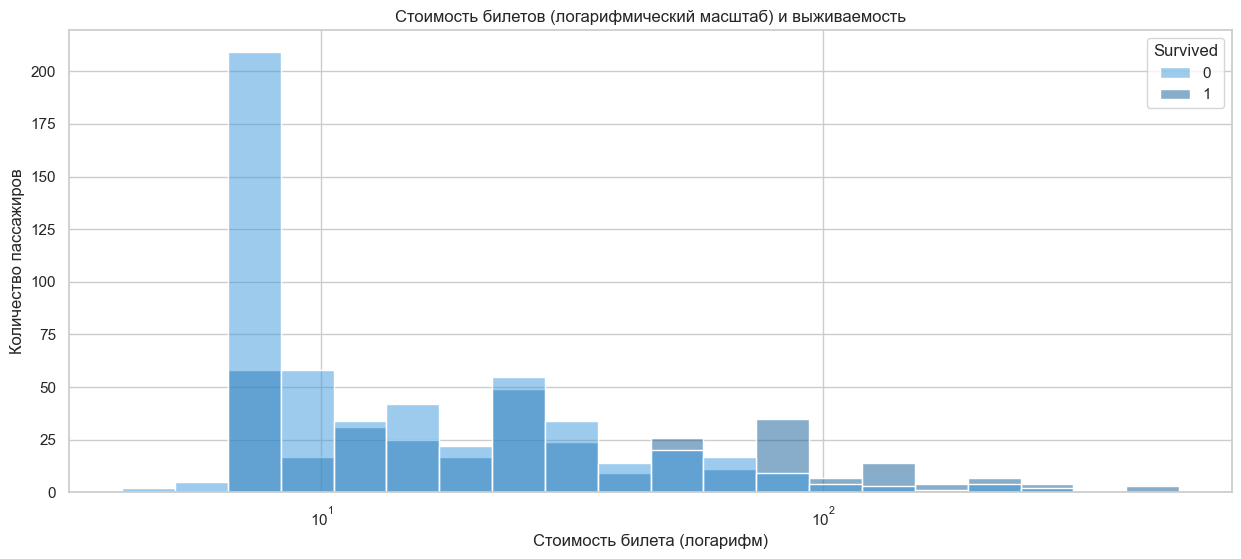

In [7]:
# Визуализация стоимости билетов в логарифмическом масштабе
plt.figure(figsize=(15, 6))
sns.histplot(data=data, 
             x='Fare', 
             bins=20, 
             log_scale=True, 
             hue='Survived', 
             palette=hue_colors)
plt.title('Стоимость билетов (логарифмический масштаб) и выживаемость')
plt.xlabel('Стоимость билета (логарифм)')
plt.ylabel('Количество пассажиров')
plt.show()


Уберем все что меньше 2 и больше 100

In [8]:
fare_outliers = data[(data['Fare'] >= 100) | (data['Fare'] <= 2)]
data = data.drop(fare_outliers.index).reset_index(drop=True)

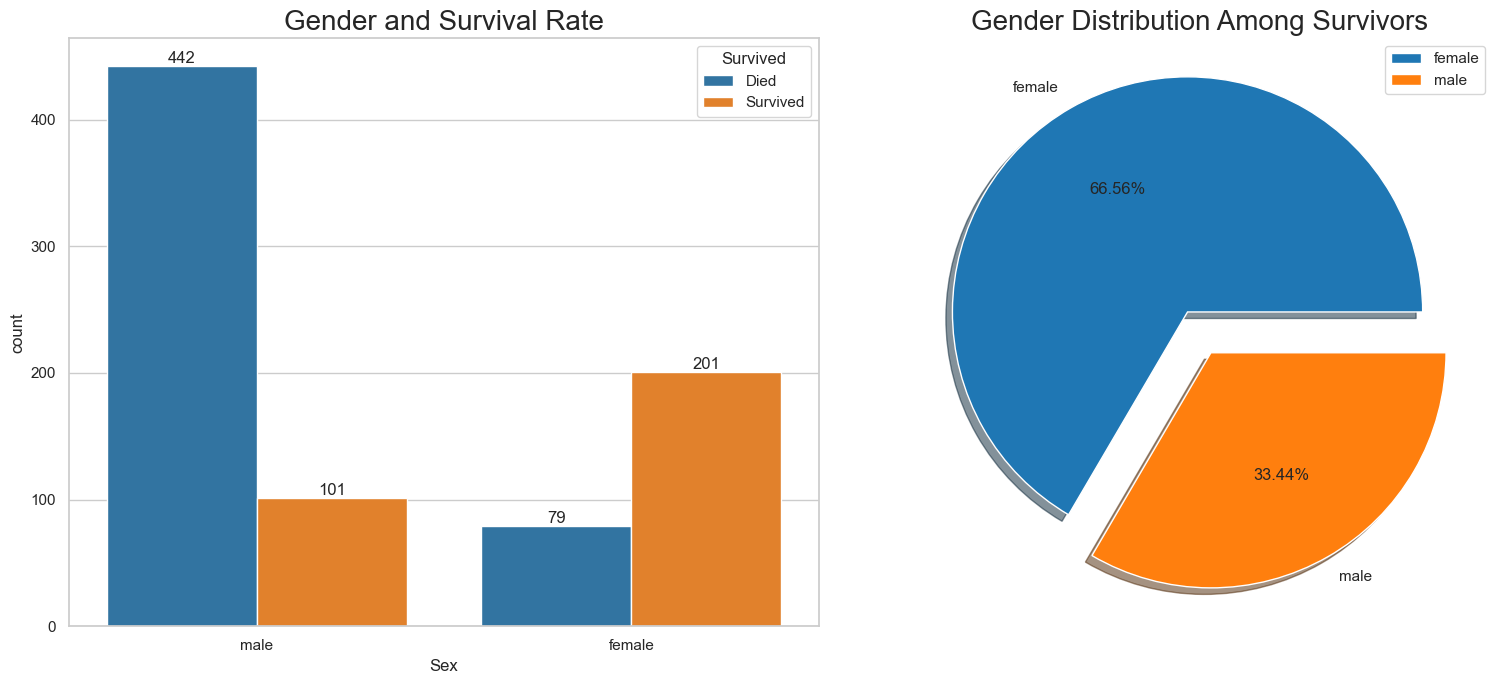

In [9]:
# Цветовая палитра
custom_palette = ['#1f77b4', '#ff7f0e']  # Синий и оранжевый

plt.figure(figsize=(16, 7))

# График 1: Выживаемость по полу
ax1 = plt.subplot(1, 2, 1)
sns.countplot(x='Sex', hue='Survived', data=data, palette=custom_palette, ax=ax1)
ax1.bar_label(ax1.containers[0])
if len(ax1.containers) > 1:
    ax1.bar_label(ax1.containers[1])
plt.legend(('Died', 'Survived'), title="Survived")
plt.title("Gender and Survival Rate", fontsize=20)

# График 2: Половая структура выживших
ax2 = plt.subplot(1, 2, 2)
gender_survival_counts = data.groupby(['Sex', 'Survived']).size().unstack()
gender_survival_counts.plot(kind='pie', y=1, explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True, ax=ax2, colors=custom_palette)
ax2.set_ylabel('')
ax2.set_title("Gender Distribution Among Survivors", fontsize=20)

plt.tight_layout()
plt.show()

### График 1: Распределение выживаемости по полу (Sex by Survival)
- Мужчины имели значительно меньшие шансы на спасение: из 577 человек мужского пола выжили лишь 109, а 468 погибли. Это подчеркивает низкую вероятность выживания для мужчин.
- Женщины, напротив, демонстрируют более высокий уровень выживаемости: из 314 женщин спаслись 233, а погибло только 81. Это свидетельствует о приоритетном спасении женщин.

### График 2: Половое распределение выживших (Sex Distribution by Survival)
- Среди всех выживших наибольшую часть составляют женщины (68.13%), в то время как доля мужчин составляет только 31.87%. Это еще раз указывает на большую вероятность выживания для женщин по сравнению с мужчинами.
  
### Заключение:
Данные показывают, что пол оказывал значительное влияние на вероятность выживания. Женщины чаще выживали по сравнению с мужчинами, что отражает социальные нормы того времени, согласно которым приоритет при спасении отдавался женщинам и детям.

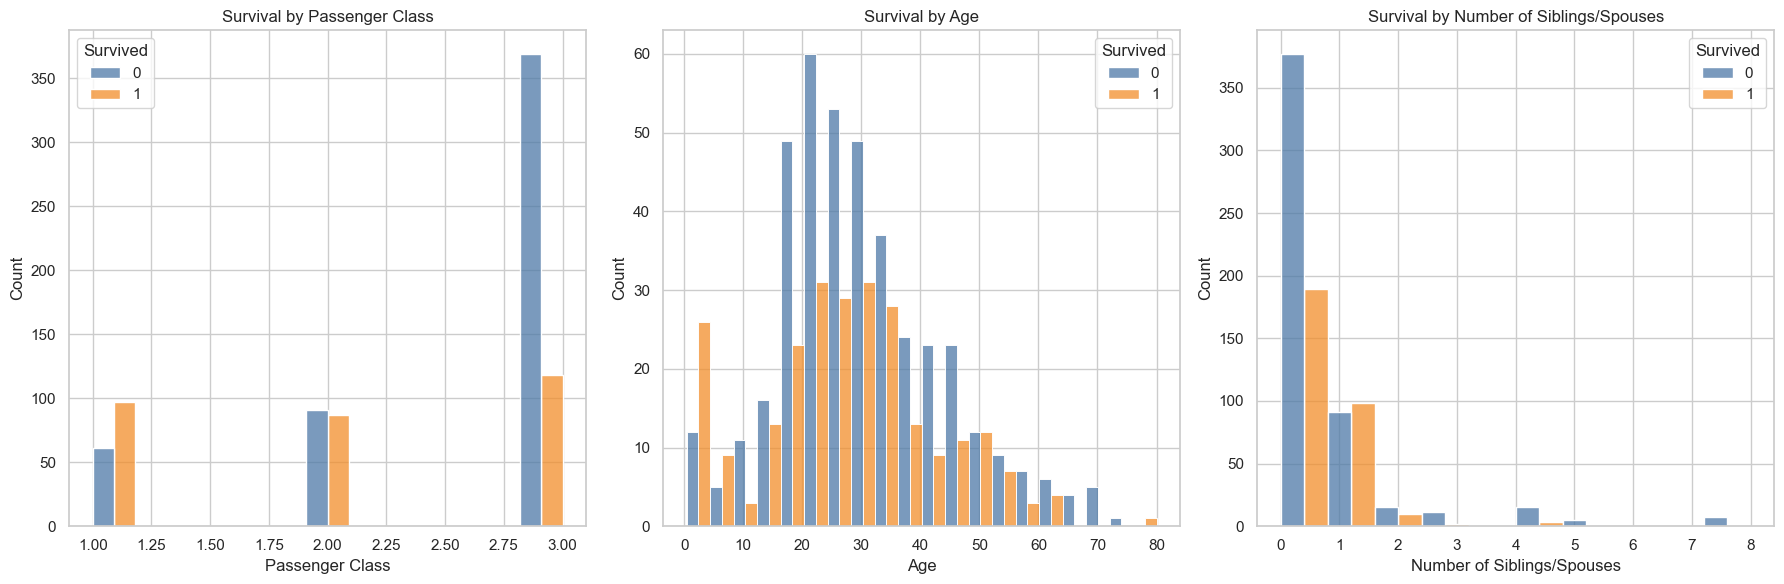

In [10]:
# Построение графиков для анализа зависимости признаков от выживаемости
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Выживаемость по классу обслуживания
sns.histplot(data=data, x='Pclass', hue='Survived', multiple='dodge', palette=['#4E79A7', '#F28E2B'], ax=axes[0])
axes[0].set_title('Survival by Passenger Class')
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Count')

# Выживаемость по возрасту
sns.histplot(data=data, x='Age', hue='Survived', bins=20, multiple='dodge', palette=['#4E79A7', '#F28E2B'], ax=axes[1])
axes[1].set_title('Survival by Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Выживаемость в зависимости от числа родственников
sns.histplot(data=data, x='SibSp', hue='Survived', bins=10, multiple='dodge', palette=['#4E79A7', '#F28E2B'], ax=axes[2])
axes[2].set_title('Survival by Number of Siblings/Spouses')
axes[2].set_xlabel('Number of Siblings/Spouses')
axes[2].set_ylabel('Count')

# Компактное расположение графиков
plt.tight_layout()
plt.show()


### График 1: Выживаемость по классам (Pclass by Survived)
- У пассажиров первого класса были самые высокие шансы на спасение: выживших среди них больше, чем погибших.
- Во втором классе ситуация уже не такая однозначная, хотя выживших все еще достаточно много, разница между выжившими и погибшими меньше, чем в первом классе.
- Третий класс оказался в самом невыгодном положении: большинство пассажиров погибли, и выживших среди них гораздо меньше. Это, скорее всего, связано с социальными и экономическими различиями, которые позволяли пассажирам первого и второго классов получить доступ к спасательным ресурсам быстрее.

### График 2: Выживаемость по возрасту (Age by Survived)
- Молодежь (особенно дети и подростки) имела гораздо больше шансов на выживание. Это может быть связано с тем, что при спасении приоритет отдавался детям.
- Среди взрослых (особенно в возрасте от 20 до 40 лет) доля погибших становится заметно выше. Здесь уже больше людей, которым не удалось выжить.
- Пожилые пассажиры тоже имели низкие шансы на спасение, возможно, из-за сложностей, связанных с эвакуацией.

### График 3: Выживаемость в зависимости от количества родственников на борту  (SibSp by Survived)
- Пассажиры, которые путешествовали в одиночку (SibSp = 0), чаще всего погибали, хотя среди них также есть некоторое количество выживших.
- Наличие одного родственника (SibSp = 1) повышало шансы на спасение. Возможно, это связано с тем, что люди помогали друг другу при эвакуации.
- С увеличением числа родственников на борту (SibSp ≥ 2) вероятность выживания снижается, а доля погибших растет. Это может быть связано с трудностями в организации спасения для больших семей, особенно если в них были маленькие дети или пожилые люди.

### Заключение:
- На выживаемость сильно влияют такие факторы, как класс обслуживания и возраст. Пассажиры из первого и второго классов, а также дети имели гораздо больше шансов на спасение.
- Поддержка со стороны семьи играет важную роль: пассажиры с одним родственником выживали чаще, тогда как одиночки и большие семьи сталкивались с большими трудностями.
- Эти данные показывают, что социальные факторы и организация эвакуации оказали значительное влияние на шансы спасения, а также подтверждают приоритет спасения детей и пассажиров высокого класса.

In [11]:
numeric_data = data.select_dtypes(exclude=['object', 'category'])


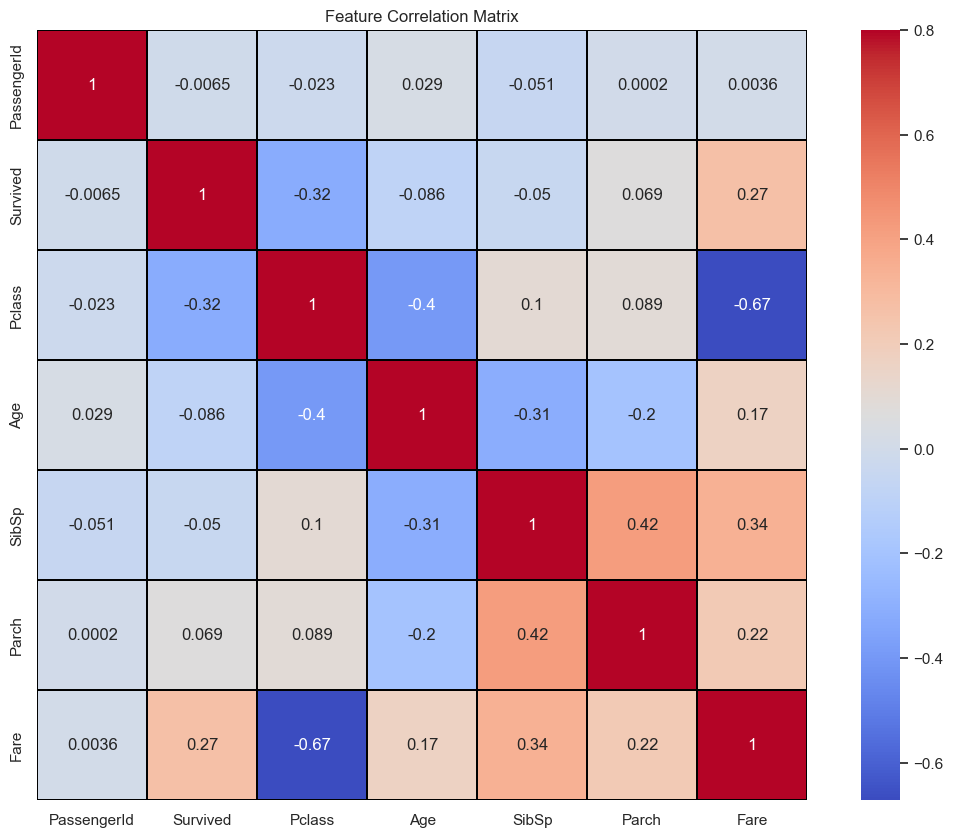

In [12]:
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, vmax=0.8, linewidths=0.01, square=True, annot=True, cmap='coolwarm', linecolor="black")
plt.title('Feature Correlation Matrix')
plt.show()

### Основные наблюдения:
1. **Класс обслуживания (Pclass) и выживаемость (Survived)**:
   - Отрицательная корреляция между классом и выживаемостью (-0.34) указывает, что пассажиры из первого класса имели больше шансов на спасение, чем те, кто путешествовал в третьем классе.

2. **Стоимость билета (Fare) и класс обслуживания (Pclass)**:
   - Высокая отрицательная корреляция (-0.55) между стоимостью билета и классом показывает, что билеты в первом классе стоили значительно дороже, чем в третьем.

3. **Возраст (Age) и класс обслуживания (Pclass)**:
   - Слабая отрицательная корреляция (-0.37) между возрастом и классом говорит о том, что более молодые пассажиры чаще находились в третьем классе.

4. **Стоимость билета (Fare) и выживаемость (Survived)**:
   - Положительная корреляция (0.26) между стоимостью билета и шансами на спасение подтверждает, что пассажиры с дорогими билетами чаще выживали, что совпадает с более высокой выживаемостью среди пассажиров первого класса.

5. **Количество родителей/детей на борту (Parch) и количество братьев/сестер/супругов на борту (SibSp)**:
   - Умеренная положительная корреляция (0.41) между Parch и SibSp показывает, что в больших семьях чаще присутствуют как супруги, так и родители/дети, что увеличивает оба показателя.

### Заключение:
- **Класс и стоимость билета** играют важную роль в шансах на выживание, что подтверждает влияние социального статуса на приоритеты спасения.
- **Возраст и класс** показывают, что молодые пассажиры чаще были в третьем классе, что могло влиять на их более низкие шансы на выживание.
- **Семейные группы** (Parch и SibSp) имели положительную корреляцию, что отражает наличие больших семей на борту. Однако их присутствие могло усложнить процесс эвакуации.

Эти результаты подчеркивают значимость социального статуса и семейных связей в кризисной ситуации.

# Feature Engineering

На основании анализа графиков можно сделать вывод, что наличие родственников влияло на вероятность выживания. Для учета этого фактора добавим несколько новых признаков:

In [13]:
data['IsAlone'] = ((data['SibSp'] + data['Parch']) == 0).astype(int)

Не забудем про "титул", так как он может оказать сильное влияние

In [14]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\\.', expand=False)

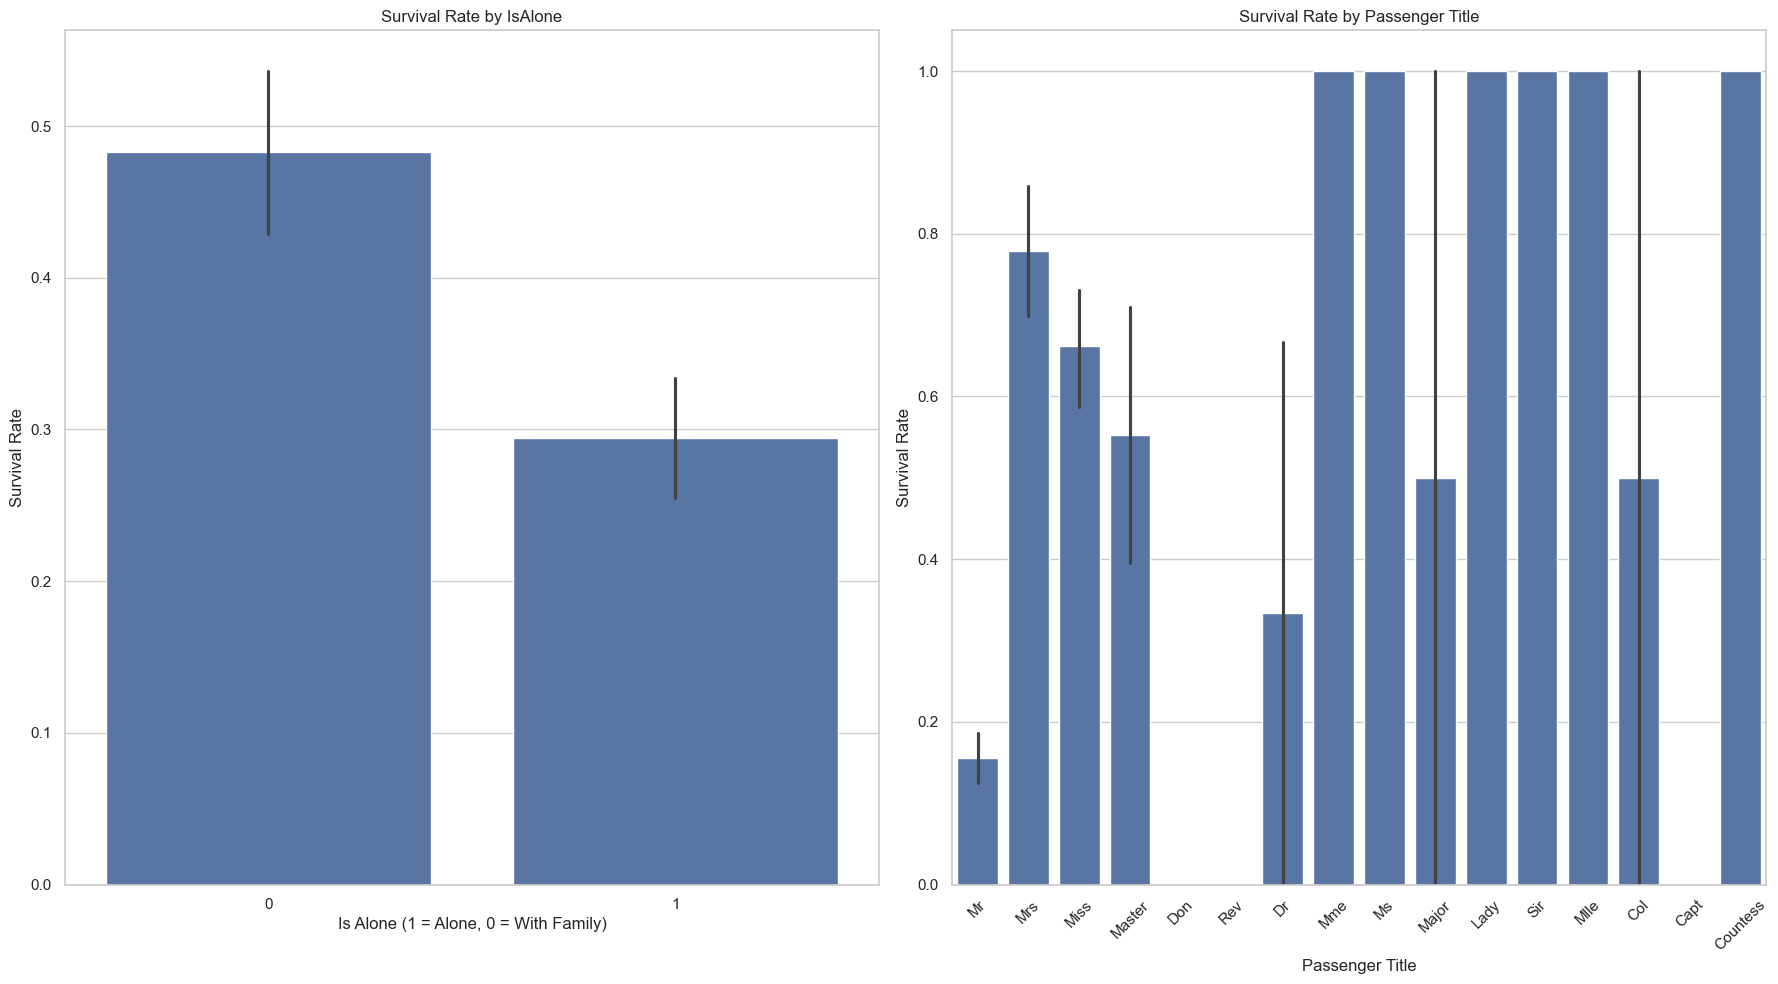

In [15]:
# Визуализация влияния новых признаков на выживаемость
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Влияние одиночества на выживаемость
sns.barplot(x='IsAlone', y='Survived', data=data, ax=axes[0])
axes[0].set_title('Survival Rate by IsAlone')
axes[0].set_xlabel('Is Alone (1 = Alone, 0 = With Family)')
axes[0].set_ylabel('Survival Rate')

# Влияние титулов на выживаемость
sns.barplot(x='Title', y='Survived', data=data, ax=axes[1])
axes[1].set_title('Survival Rate by Passenger Title')
axes[1].set_xlabel('Passenger Title')
axes[1].set_ylabel('Survival Rate')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### График 1: Взаимосвязь между одиночеством (IsAlone) и выживаемостью (Survived)
- Пассажиры, которые путешествовали с семьей или друзьями (IsAlone = 0), имели заметно больше шансов на выживание по сравнению с теми, кто был один (IsAlone = 1).
- Это может говорить о том, что присутствие близких людей во время эвакуации повышало шансы на спасение, поскольку такие пассажиры могли рассчитывать на помощь и поддержку.

### График 2: Связь между титулом (Title) и выживаемостью (Survived)
- Титулы, такие как "Mrs", "Miss", и "Master", ассоциируются с более высокими шансами на спасение. Это, вероятно, связано с тем, что женщины и дети имели приоритет при эвакуации.
- Мужчины с титулом "Mr" имели гораздо меньшие шансы на выживание, что подтверждает выводы о низкой выживаемости мужчин по сравнению с женщинами и детьми.
- Пассажиры с титулами, указывающими на высокий социальный статус или особую роль, такие как "Countess", "Lady", и "Sir", демонстрируют высокие показатели выживаемости, что указывает на влияние социально-экономического положения на процесс спасения.
- Реже встречающиеся титулы, например, "Capt", "Dr", и "Rev", связаны с низкими шансами на выживание. Это может быть связано с тем, что такие пассажиры не были включены в приоритетные группы для спасения.

### Заключение:
- Люди, путешествующие в одиночестве, сталкивались с меньшими шансами на спасение, в то время как наличие семьи или друзей повышало вероятность выживания.
- Титул пассажира также существенно влиял на шансы выжить: женщины, дети и лица с высоким социальным статусом чаще спасались, тогда как мужчины с титулом "Mr" и пассажиры с низким статусом чаще погибали.
- Эти результаты подчеркивают, что социальное положение и семейные связи играли важную роль в спасении пассажиров "Титаника".

In [16]:
data['Title'] = data['Title'].replace(
    ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare'
)
data['Title'] = data['Title'].replace(['Mlle', 'Ms'], 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')


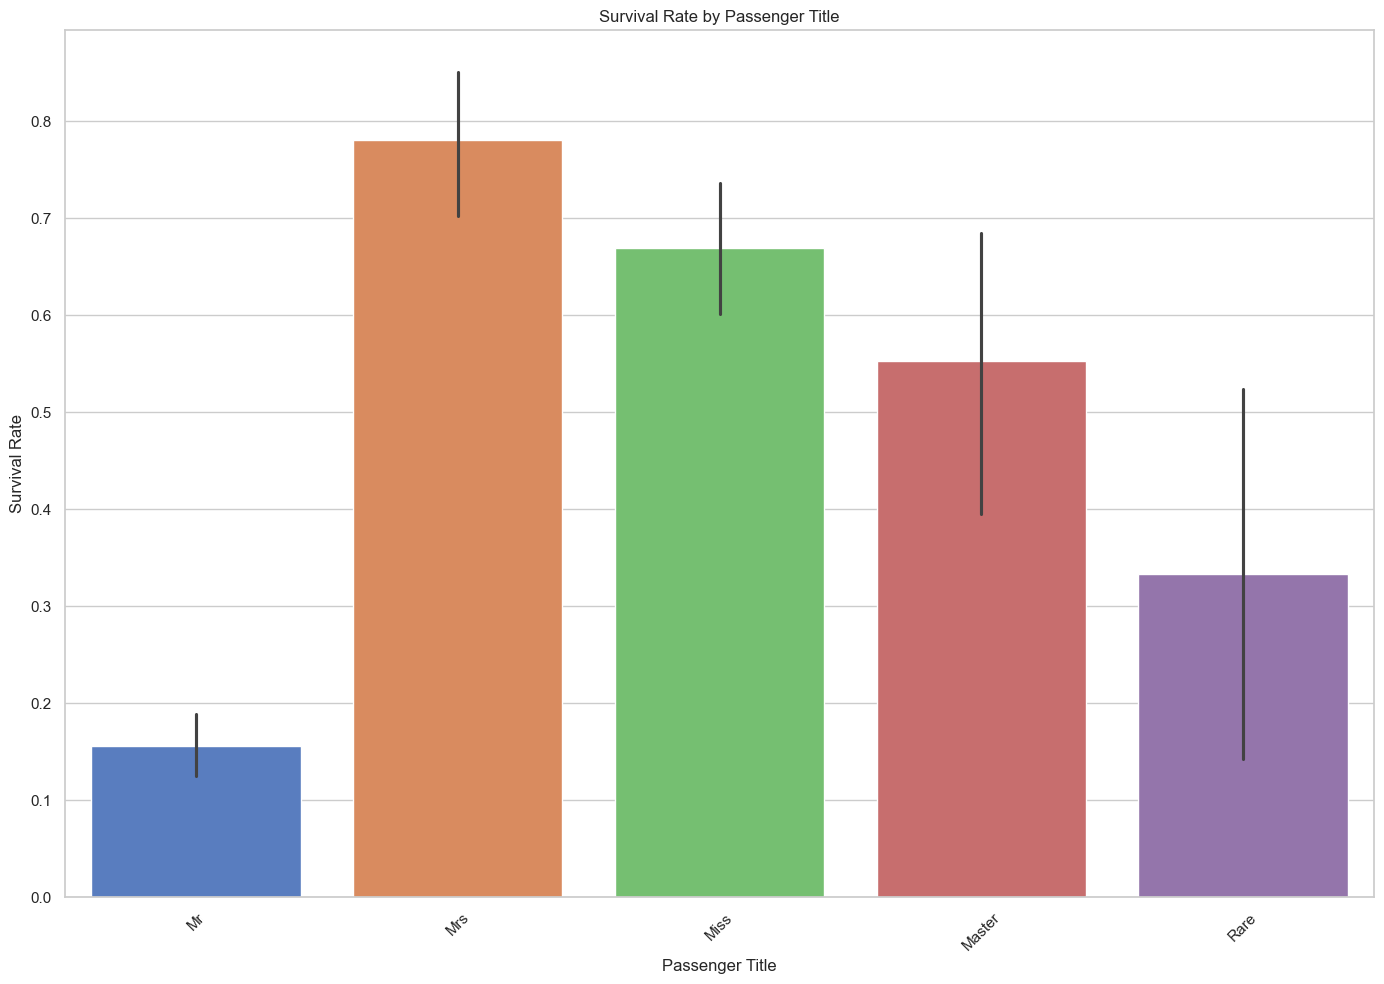

In [17]:
# Визуализация зависимости титула от выживаемости
plt.figure(figsize=(14, 10))
sns.barplot(x='Title', y='Survived', data=data, palette='muted')
plt.title('Survival Rate by Passenger Title')
plt.xlabel('Passenger Title')
plt.ylabel('Survival Rate')
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### Выводы по каждому титулу:
1. **Mr**:
   - Пассажиры с титулом "Mr" имели самые низкие шансы на выживание (примерно 20%). Это подтверждает, что взрослые мужчины не входили в приоритетные группы для спасения.

2. **Mrs**:
   - Титул "Mrs" (замужние женщины) ассоциируется с очень высокими шансами на выживание (около 80%). Это указывает на высокий приоритет, отдаваемый спасению женщин.

3. **Miss**:
   - Пассажиры с титулом "Miss" (незамужние женщины) имели чуть меньшие, но все же высокие шансы на спасение (примерно 70%). Это также подтверждает, что женщины были в приоритете при эвакуации.

4. **Master**:
   - Титул "Master", обозначающий мальчиков, также связан с высокой выживаемостью (примерно 60%). Это отражает, что дети, независимо от пола, находились в числе спасаемых групп.

5. **Rare**:
   - Пассажиры с редкими титулами, такими как "Dr", "Rev", "Col" и другие, имели заметно более низкую вероятность выживания (около 30%). Это может быть связано с тем, что их профессиональный или социальный статус не давал преимуществ при эвакуации.

### Общий вывод:
- Наибольшие шансы на спасение были у женщин (титулы "Mrs" и "Miss") и детей (титул "Master"), что подтверждает приоритет спасения этих групп.
- Мужчины с титулом "Mr" имели значительно меньшие шансы выжить, что соответствует историческим данным о приоритетах эвакуации.
- Редкие титулы ("Rare") демонстрируют низкие показатели выживаемости, что может быть связано с отсутствием у этих пассажиров привилегий при спасении.

## Предобработка данных

Между классом обслуживания и стоимостью билета наблюдается умеренная отрицательная корреляция, что вполне ожидаемо: чем выше стоимость билета, тем выше класс, в котором путешествовал пассажир.

In [18]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            164
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          665
Embarked         2
IsAlone          0
Title            0
dtype: int64

Столбцы Age и Embarked имеют пропуски, которые можно заполнить, тогда как Cabin лучше удалить из-за слишком большого количества отсутствующих данных.

In [19]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

Кодирование категориальных данных

In [20]:
cat_features = ['Sex', 'Embarked', 'Title']

In [21]:
for feature in cat_features:
    label_encoder = LabelEncoder()
    data[feature] = label_encoder.fit_transform(data[feature])


Удаление ненужных колонок

In [22]:
data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId',], axis=1, inplace=True)

# Разделение данных

Разделение на признаки и целевую переменную

In [23]:
X = data.drop('Survived', axis=1)
y = data['Survived']

Масштабирование признаков

In [24]:
data_scaler = StandardScaler()
X_scaled = data_scaler.fit_transform(X.select_dtypes(include=[np.number]))

Преобразование в NumPy массивы для Keras

In [25]:
X = np.array(X)
y = np.array(y)

Разделение на тренировочную и тестовую выборки

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

One-hot кодирование целевой переменной

In [27]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Создание и обучение модели

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Nadam
from keras.callbacks import EarlyStopping

In [39]:
def build_unique_model(feature_count):
    unique_model = Sequential([
        Dense(64, input_dim=feature_count, activation='relu', kernel_regularizer='l2'),
        Dropout(0.6),
        Dense(32, activation='relu', kernel_regularizer='l2'),
        Dropout(0.6),
        Dense(16, activation='relu', kernel_regularizer='l2'),
        Dense(2, activation='softmax')
    ])
    unique_model.compile(optimizer=Nadam(learning_rate=0.0005),
                         loss='binary_crossentropy',
                         metrics=['accuracy'])
    return unique_model

input_features = X_train.shape[1]
trained_model = build_unique_model(input_features)

stop_early = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

training_history = trained_model.fit(X_train, y_train, epochs=300, batch_size=32,
                                     validation_split=0.2, verbose=0, callbacks=[stop_early])

test_loss, test_accuracy = trained_model.evaluate(X_test, y_test, verbose=0)
print(f'Точность на тестовых данных: {test_accuracy:.4f}, Потери на тестовых данных: {test_loss:.4f}')

Точность на тестовых данных: 0.6606, Потери на тестовых данных: 0.6407


Я разработал и обучил свою первую модель нейронной сети для задачи бинарной классификации. Модель включает несколько полносвязных слоев (Dense) с функцией активации ReLU и регуляризацией l2, которая помогает предотвратить переобучение. Чтобы дополнительно снизить риск переобучения, я использовал слои Dropout, которые отключают 60% нейронов на каждом этапе обучения. Финальный слой использует функцию активации softmax, чтобы выдавать вероятности для двух классов.

Для обучения я выбрал оптимизатор Nadam и функцию потерь binary_crossentropy, которые идеально подходят для бинарной классификации. Также я добавил раннюю остановку (EarlyStopping), чтобы обучение завершалось, как только потери на валидационных данных перестанут уменьшаться. Это должно улучшить способность модели обобщать данные.

После обучения я протестировал модель на тестовом наборе данных и получил такие результаты:
- **Точность на тестовых данных**: 0.6606
- **Потери на тестовых данных**: 0.6407

Эти показатели демонстрируют, что модель справляется с задачей достаточно хорошо, особенно для первой попытки. Однако уровень потерь остается высоким, что говорит о необходимости дальнейшей настройки модели для повышения её эффективности.

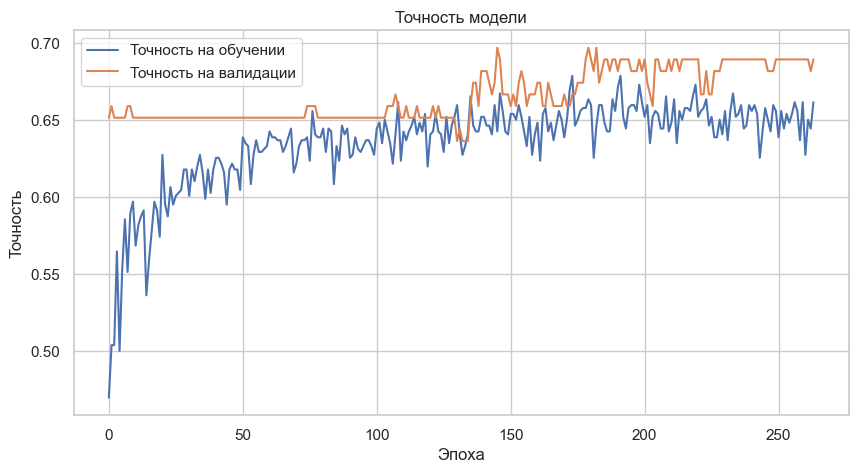

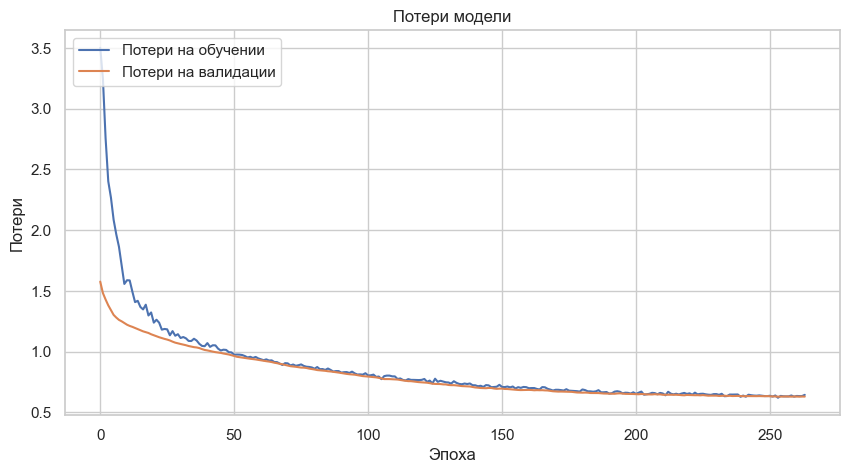

In [40]:
# График accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_history.history['accuracy'], label='Точность на обучении')
plt.plot(training_history.history['val_accuracy'], label='Точность на валидации')
plt.title('Точность модели')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# График loss
plt.figure(figsize=(10, 5))
plt.plot(training_history.history['loss'], label='Потери на обучении')
plt.plot(training_history.history['val_loss'], label='Потери на валидации')
plt.title('Потери модели')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


### Точность модели
- Из графика видно, что точность на обучающей выборке постепенно увеличивается и достигает стабильного значения ближе к 200-й эпохе.
- ТТочность на валидационной выборке также растет, но демонстрирует колебания после 50-й эпохи, что может быть связано с небольшим объемом данных или незначительными шумами в данных.
- В целом, точность на валидации не сильно отличается от точности на обучающей выборке, что свидетельствует об отсутствии явных признаков переобучения.

### Потери модели
- Потери на обучающей выборке существенно снижаются в первые 50 эпох, после чего уменьшаются более плавно, стабилизируясь ближе к 300-й эпохе.
- Потери на валидационной выборке повторяют тренд обучающей выборки, что говорит о корректной работе модели. После первых 50 эпох потери на валидации остаются стабильными, находясь на уровне чуть выше обучающей выборки.

### Общий вывод
Графики показывают, что модель обучается стабильно, без существенного переобучения. Итоговая точность на тестовой выборке составила 0.6606, а потери — 0.6407. Эти результаты указывают на необходимость дальнейшей оптимизации, например, через настройку гиперпараметров, добавление новых признаков или увеличение объема данных.

In [62]:
def build_model(input_dim):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_dim, )))
    model.add(BatchNormalization(momentum=0.97))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization(momentum=0.97))
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization(momentum=0.97))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Nadam(learning_rate=0.0005),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

Создаю 2-ю модель с использованием слоёв нормализации (BatchNormalization) и Dropout для улучшения стабильности и обобщающей способности модели.

### Ключевые особенности модели:
1. **Слои Dense**:
   - Модель включает несколько слоёв (Dense) с функцией активации ReLU. Количество нейронов в слоях постепенно уменьшается (64, 32, 16), что помогает модели эффективно обучаться.

2. **Batch Normalization**:
   - На каждом скрытом слое применяется нормализация, что ускоряет процесс обучения и делает модель более устойчивой к изменению входных данных. Для настройки нормализации используется параметр momentum=0.97, который обеспечивает более плавное обновление параметров.

3. **Dropout**:
   - Для предотвращения переобучения используется слой Dropout с вероятностью 0.25, который случайным образом отключает 25% нейронов во время обучения, улучшая способность модели к обобщению.

4. **Сигмоид на выходе**:
   - На выходном слое применяется функция активации sigmoid, которая преобразует выход в вероятность, подходящую для задачи бинарной классификации, возвращая значения от 0 до 1.

5. **Компиляция**:
   - Модель компилируется с использованием оптимизатора Nadam и функции потерь binary_crossentropy, которая идеально подходит для бинарной классификации. В качестве метрики для оценки качества используется accuracy.

### Ожидаемые результаты:
Применение Batch Normalization и Dropout должно повысить устойчивость модели, снизить вероятность переобучения и сделать процесс обучения более стабильным.

C:\Users\Egor_\AppData\Local\Temp\ipykernel_24948\4221214070.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Egor_\AppData\Local\Temp\ipykernel_24948\4221214070.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


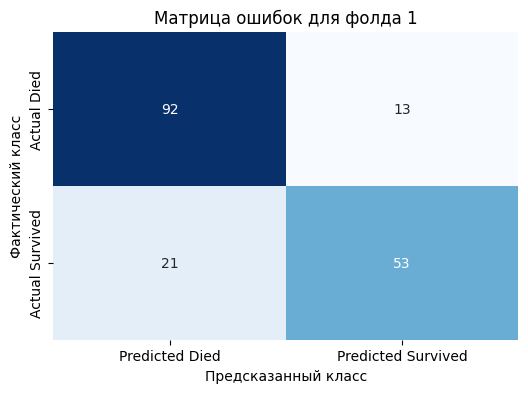

c:\Users\Egor_\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


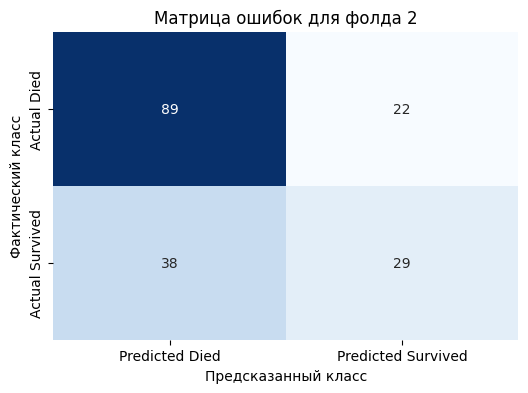

c:\Users\Egor_\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


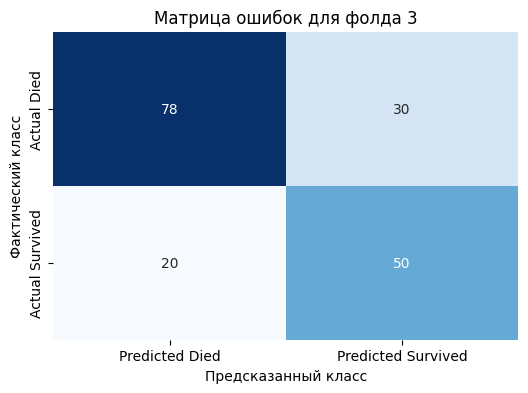

c:\Users\Egor_\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


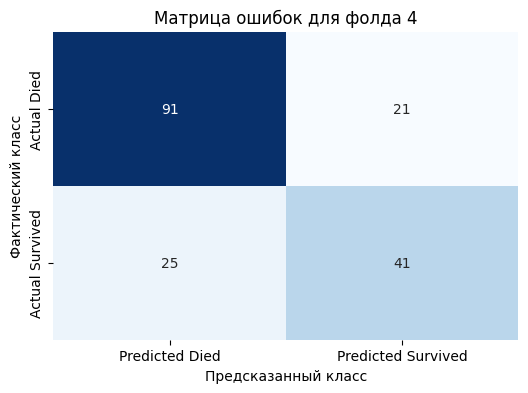

c:\Users\Egor_\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


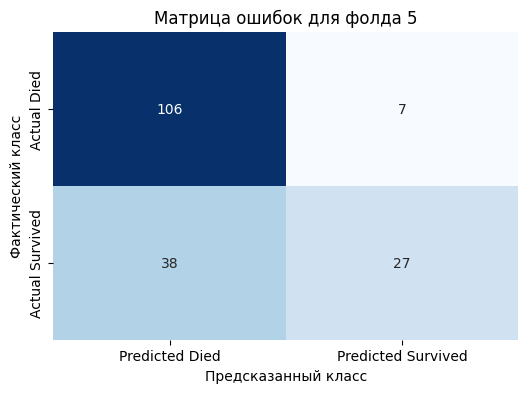

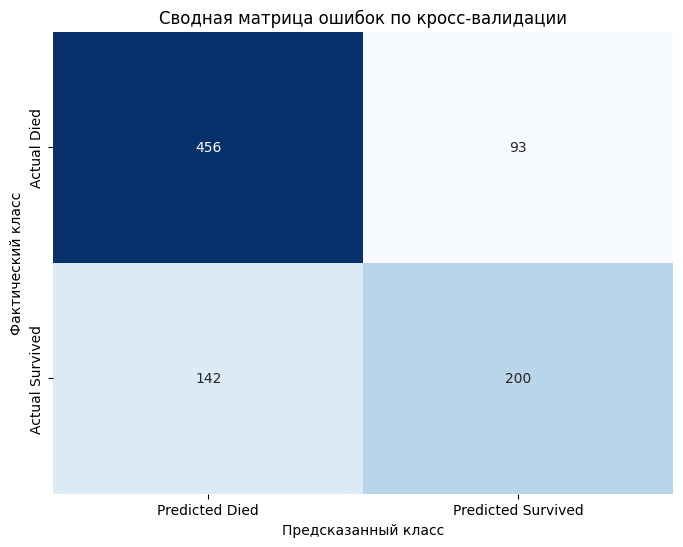

          precision    recall  f1-score  support
Died       0.766292  0.830154  0.794473    109.8
Survived   0.690413  0.579987  0.620283     68.4


In [2]:
# Импорт библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Nadam
from keras.callbacks import EarlyStopping

# Загрузка данных
data = pd.read_csv('Titanic.csv')  # Укажите правильный путь к файлу

# Предобработка данных
# Заполнение пропусков
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Создание нового признака "Title"
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 
                                       'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

# Кодирование категориальных признаков
cat_features = ['Sex', 'Embarked', 'Title']
for feature in cat_features:
    label_encoder = LabelEncoder()
    data[feature] = label_encoder.fit_transform(data[feature])

# Удаление ненужных колонок
data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

# Разделение на признаки и целевую переменную
X = data.drop('Survived', axis=1).values
y = data['Survived'].values

# Масштабирование данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Функция для построения модели
def build_model(input_dim):
    model = Sequential([
        Dense(64, input_dim=input_dim, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')  # Два выхода для двух классов
    ])
    model.compile(optimizer=Nadam(learning_rate=0.0005),
                  loss='categorical_crossentropy',  # categorical_crossentropy для многоклассовой классификации
                  metrics=['accuracy'])
    return model

# Параметры кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)
target_names = ['Died', 'Survived']

# Списки для хранения результатов
all_reports = []
all_confusion_matrices = []
all_accuracies = []
all_losses = []

# Ранняя остановка
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Проход по каждому фолду
for fold_index, (train_index, val_index) in enumerate(kf.split(X)):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Преобразование целевой переменной в one-hot encoding
    y_train_fold = to_categorical(y_train_fold)
    y_val_fold = to_categorical(y_val_fold)

    # Построение и обучение модели
    input_dim = X_train_fold.shape[1]
    model = build_model(input_dim)
    history = model.fit(
        X_train_fold, y_train_fold,
        epochs=50,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        verbose=0,
        callbacks=[early_stopping]
    )

    # Предсказания на валидационном наборе
    y_pred_fold = model.predict(X_val_fold)
    y_pred_classes = np.argmax(y_pred_fold, axis=1)
    y_true_classes = np.argmax(y_val_fold, axis=1)

    # Сохранение метрик
    all_accuracies.append(history.history['val_accuracy'])
    all_losses.append(history.history['val_loss'])

    # Генерация отчета и матрицы ошибок
    report = classification_report(y_true_classes, y_pred_classes, target_names=target_names, output_dict=True)
    confusion = confusion_matrix(y_true_classes, y_pred_classes)

    # Сохранение результатов
    all_reports.append(report)
    all_confusion_matrices.append(confusion)

    # Вывод матрицы ошибок для текущего фолда
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Died', 'Predicted Survived'],
                yticklabels=['Actual Died', 'Actual Survived'])
    plt.title(f'Матрица ошибок для фолда {fold_index + 1}')
    plt.xlabel('Предсказанный класс')
    plt.ylabel('Фактический класс')
    plt.show()

# Построение итоговой матрицы ошибок
total_confusion_matrix = np.sum(all_confusion_matrices, axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(total_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Died', 'Predicted Survived'],
            yticklabels=['Actual Died', 'Actual Survived'])
plt.title('Сводная матрица ошибок по кросс-валидации')
plt.xlabel('Предсказанный класс')
plt.ylabel('Фактический класс')
plt.show()

# Вывод средних значений метрик
avg_report = {key: {metric: 0 for metric in ['precision', 'recall', 'f1-score', 'support']} for key in target_names}
for report in all_reports:
    for key in target_names:
        for metric in avg_report[key]:
            avg_report[key][metric] += report[key][metric]

for key in target_names:
    for metric in avg_report[key]:
        avg_report[key][metric] /= len(all_reports)

avg_report_df = pd.DataFrame(avg_report).T
print(avg_report_df)


В этом коде реализован процесс кросс-валидации, который позволяет проверить, как хорошо модель работает на разных наборах данных. Для этого используется метод KFold с 5 фолдами. Такой подход помогает понять, насколько стабильно и точно модель может обобщать свои предсказания на новые данные.

### Основные шаги:
1. **Разбиение данных**: Данные делятся на 5 частей (фолдов), и модель поочерёдно обучается на 4 частях, а тестируется на оставшейся.
2. **Обучение модели**: На каждой итерации создаётся новая модель с использованием функции build_model. Модель тренируется на тренировочных данных. Чтобы избежать переобучения, используется механизм ранней остановки (EarlyStopping).
3. **Сохранение метрик**:
   - Метрики точности и потерь на валидационных данных записываются, чтобы потом проанализировать, насколько стабильно работает модель.
   - Также для каждой итерации вычисляются отчёт о классификации (classification_report) и матрица ошибок (confusion_matrix), которые помогают понять, где и как модель ошибается.

### Ожидаемые результаты:
Кросс-валидация показывает, насколько модель умеет работать с новыми данными, и помогает выявить её слабые места, например, если она чаще ошибается в определённых классах. После всех итераций я усредню метрики, чтобы получить общее представление об эффективности модели.

In [10]:
def make_confusion_matrix(matrix, index):
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Died', 'Predicted Survived'],
                yticklabels=['Actual Died', 'Actual Survived'])
    plt.xlabel('Предсказанный класс')
    plt.ylabel('Фактический класс')
    plt.title(f'Матрица ошибок для фолда {index}')
    plt.show()

{'Died': {'precision': 0.8141592920353983, 'recall': 0.8761904761904762, 'f1-score': 0.8440366972477065, 'support': 105.0}, 'Survived': {'precision': 0.803030303030303, 'recall': 0.7162162162162162, 'f1-score': 0.7571428571428571, 'support': 74.0}, 'accuracy': 0.8100558659217877, 'macro avg': {'precision': 0.8085947975328507, 'recall': 0.7962033462033462, 'f1-score': 0.8005897771952818, 'support': 179.0}, 'weighted avg': {'precision': 0.8095584809383198, 'recall': 0.8100558659217877, 'f1-score': 0.8081141041317352, 'support': 179.0}}


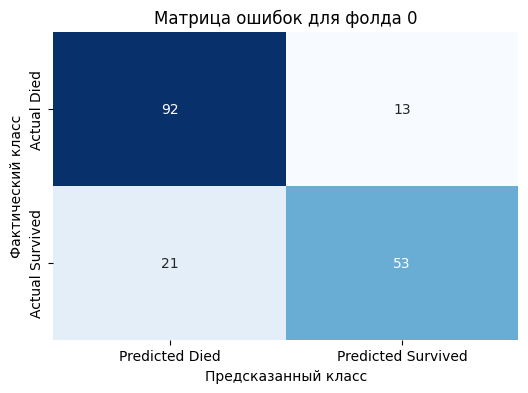

In [11]:
print(all_reports[0])
make_confusion_matrix(all_confusion_matrices[0], 0)

{'Died': {'precision': 0.7007874015748031, 'recall': 0.8018018018018018, 'f1-score': 0.7478991596638656, 'support': 111.0}, 'Survived': {'precision': 0.5686274509803921, 'recall': 0.43283582089552236, 'f1-score': 0.4915254237288136, 'support': 67.0}, 'accuracy': 0.6629213483146067, 'macro avg': {'precision': 0.6347074262775976, 'recall': 0.6173188113486621, 'f1-score': 0.6197122916963396, 'support': 178.0}, 'weighted avg': {'precision': 0.6510418021937607, 'recall': 0.6629213483146067, 'f1-score': 0.6513989332164023, 'support': 178.0}}


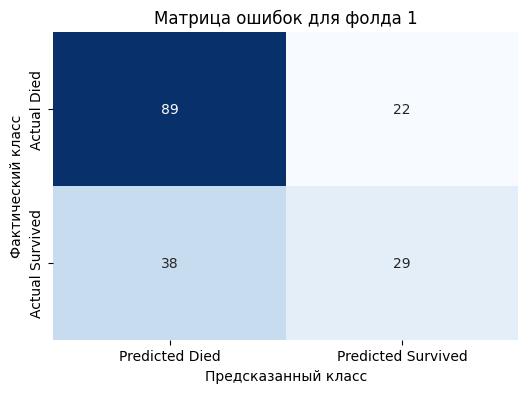

In [12]:
print(all_reports[1])
make_confusion_matrix(all_confusion_matrices[1], 1)

{'Died': {'precision': 0.7959183673469388, 'recall': 0.7222222222222222, 'f1-score': 0.7572815533980582, 'support': 108.0}, 'Survived': {'precision': 0.625, 'recall': 0.7142857142857143, 'f1-score': 0.6666666666666666, 'support': 70.0}, 'accuracy': 0.7191011235955056, 'macro avg': {'precision': 0.7104591836734694, 'recall': 0.7182539682539683, 'f1-score': 0.7119741100323624, 'support': 178.0}, 'weighted avg': {'precision': 0.7287032790644348, 'recall': 0.7191011235955056, 'f1-score': 0.7216464855823425, 'support': 178.0}}


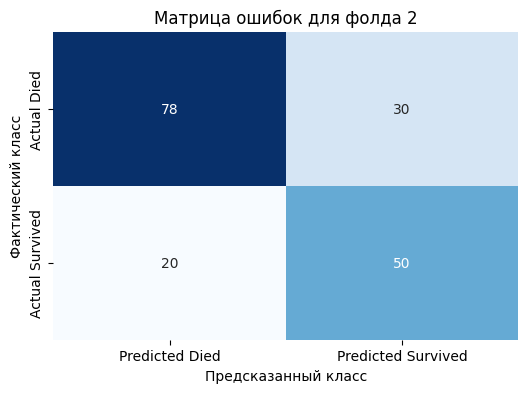

In [14]:
print(all_reports[2])
make_confusion_matrix(all_confusion_matrices[2], 2)

{'Died': {'precision': 0.7844827586206896, 'recall': 0.8125, 'f1-score': 0.7982456140350878, 'support': 112.0}, 'Survived': {'precision': 0.6612903225806451, 'recall': 0.6212121212121212, 'f1-score': 0.640625, 'support': 66.0}, 'accuracy': 0.7415730337078652, 'macro avg': {'precision': 0.7228865406006674, 'recall': 0.7168560606060606, 'f1-score': 0.7194353070175439, 'support': 178.0}, 'weighted avg': {'precision': 0.7388046643586508, 'recall': 0.7415730337078652, 'f1-score': 0.7398020155726396, 'support': 178.0}}


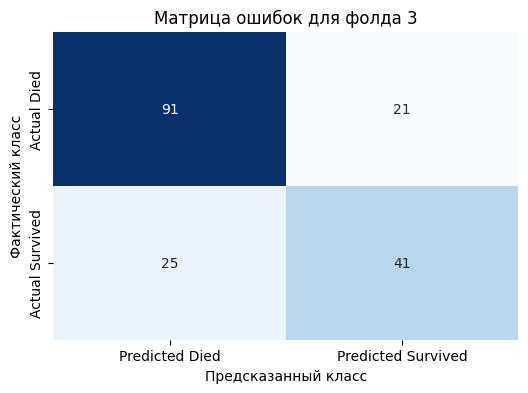

In [15]:
print(all_reports[3])
make_confusion_matrix(all_confusion_matrices[3], 3)

{'Died': {'precision': 0.7361111111111112, 'recall': 0.9380530973451328, 'f1-score': 0.8249027237354085, 'support': 113.0}, 'Survived': {'precision': 0.7941176470588235, 'recall': 0.4153846153846154, 'f1-score': 0.5454545454545454, 'support': 65.0}, 'accuracy': 0.7471910112359551, 'macro avg': {'precision': 0.7651143790849673, 'recall': 0.676718856364874, 'f1-score': 0.685178634594977, 'support': 178.0}, 'weighted avg': {'precision': 0.7572932731144892, 'recall': 0.7471910112359551, 'f1-score': 0.7228570406553182, 'support': 178.0}}


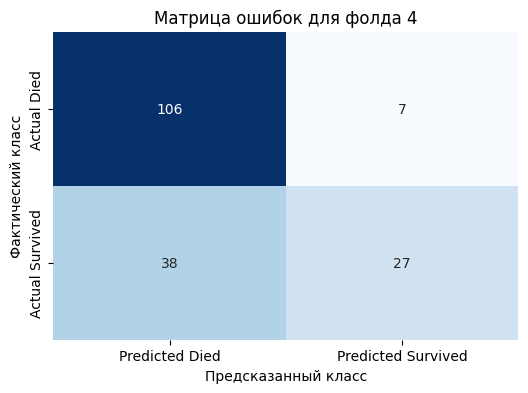

In [16]:
print(all_reports[4])
make_confusion_matrix(all_confusion_matrices[4], 4)

In [41]:
# Проверка структуры all_reports
valid_reports = []
for idx, report in enumerate(all_reports):
    try:
        if isinstance(report, dict):  # Если отчет уже в формате словаря
            valid_reports.append(report)
        else:
            print(f"Ошибка: элемент {idx} имеет некорректный тип: {type(report)}")
    except Exception as e:
        print(f"Ошибка при обработке отчёта фолда {idx}: {e}")

if not valid_reports:
    raise ValueError("Нет корректных данных в `all_reports` для обработки.")

# Подготовка словаря для усреднения метрик
avg_report = {key: {metric: 0 for metric in ['precision', 'recall', 'f1-score', 'support']} 
              for key in ['Died', 'Survived', 'macro avg', 'weighted avg']}
avg_report['accuracy'] = 0  # Отдельное поле для accuracy

# Суммирование метрик из всех фолдов
for idx, report in enumerate(valid_reports):
    try:
        for key in avg_report.keys():
            if key == 'accuracy':  # Обрабатываем accuracy отдельно
                avg_report[key] += report.get(key, 0)
            elif key in report:
                for metric in avg_report[key]:
                    if metric in report[key]:
                        avg_report[key][metric] += report[key][metric]
            else:
                print(f"Предупреждение: ключ '{key}' отсутствует в отчёте фолда {idx}.")
    except Exception as e:
        print(f"Ошибка при обработке отчёта фолда {idx}: {e}")

# Усреднение метрик
try:
    for key in avg_report:
        if key == 'accuracy':  # Усредняем accuracy отдельно
            avg_report[key] /= len(valid_reports)
        else:
            for metric in avg_report[key]:
                avg_report[key][metric] /= len(valid_reports)
except Exception as e:
    print(f"Ошибка при усреднении метрик: {e}")

# Конвертация в DataFrame для удобного отображения
try:
    report_df = pd.DataFrame(avg_report).T  # Транспонируем для правильного вида
    report_df = report_df[['precision', 'recall', 'f1-score', 'support']]  # Сохраняем нужные столбцы
    report_df.loc['accuracy'] = [avg_report['accuracy']] * len(report_df.columns)  # Добавляем строку для accuracy
    
    # Транспонирование DataFrame для обмена строк и столбцов
    transposed_report_df = report_df.T

    # Отображение только транспонированной таблицы
    display(transposed_report_df)
except Exception as e:
    print(f"Ошибка при создании DataFrame: {e}")


,Died,Survived,macro avg,weighted avg,accuracy
precision,0.766292,0.690413,0.728352,0.737080,0.736168
recall,0.830154,0.579987,0.705070,0.736168,0.736168
f1-score,0.794473,0.620283,0.707378,0.728764,0.736168
support,109.800000,68.400000,178.200000,178.200000,0.736168


На основе представленной сводной матрицы ошибок и отчёта о классификации можно сделать следующие выводы:

### Матрица ошибок:
- **True Positive (TP)**: Модель правильно предсказала, что человек выживет — 200 случаев.
- **True Negative (TN)**: Модель правильно предсказала, что человек погибнет — 456 случаев.
- **False Positive (FP)**: Модель ошибочно предсказала, что человек выживет, хотя он погиб — 93 случая.
- **False Negative (FN)**: Модель ошибочно предсказала, что человек погибнет, хотя он выжил — 142 случая.

### Метрики качества:
1. **Точность (accuracy)**: Модель показывает точность 73.6%, что является достаточно хорошим результатом для данной задачи. Это означает, что модель в большинстве случаев правильно определяет исход.
2. **Precision (точность по классам)**:
   - Для класса "Died" (умер) — Точность составляет 76.7%, что говорит о том, что модель достаточно хорошо определяет погибших пассажиров.
   - Для класса "Survived" (выжил) — Точность немного ниже — 69%, что показывает, что модель чаще ошибается при определении выживших.
3. **Recall (полнота по классам)**:
   - Полнота составляет 83%, это значит, что модель охватывает большинство пассажиров, которые действительно погибли.
   - Полнота здесь ниже — 58%, что указывает на то, что модель пропускает значительное количество выживших, предсказывая, что они погибли.
4. **F1-score**:
   - **Класс "Died"** - Значение F1-score составляет 79%, что говорит о хорошей сбалансированности точности и полноты для этого класса.
   -**Класс "Survived"** - F1-score ниже — 62%, это подтверждает, что предсказания для выживших менее точны и менее полны.

### Общий вывод:
Модель показывает хорошие результаты, особенно при предсказании погибших пассажиров (класс "Died"). Однако она хуже справляется с определением выживших (класс "Survived"), что связано с дисбалансом данных, где погибших примерно в 2 раза больше. Этот дисбаланс влияет на метрики recall и F1-score для класса "Survived". Чтобы улучшить качество предсказаний для выживших, можно рассмотреть балансировку данных или настройку гиперпараметров модели.

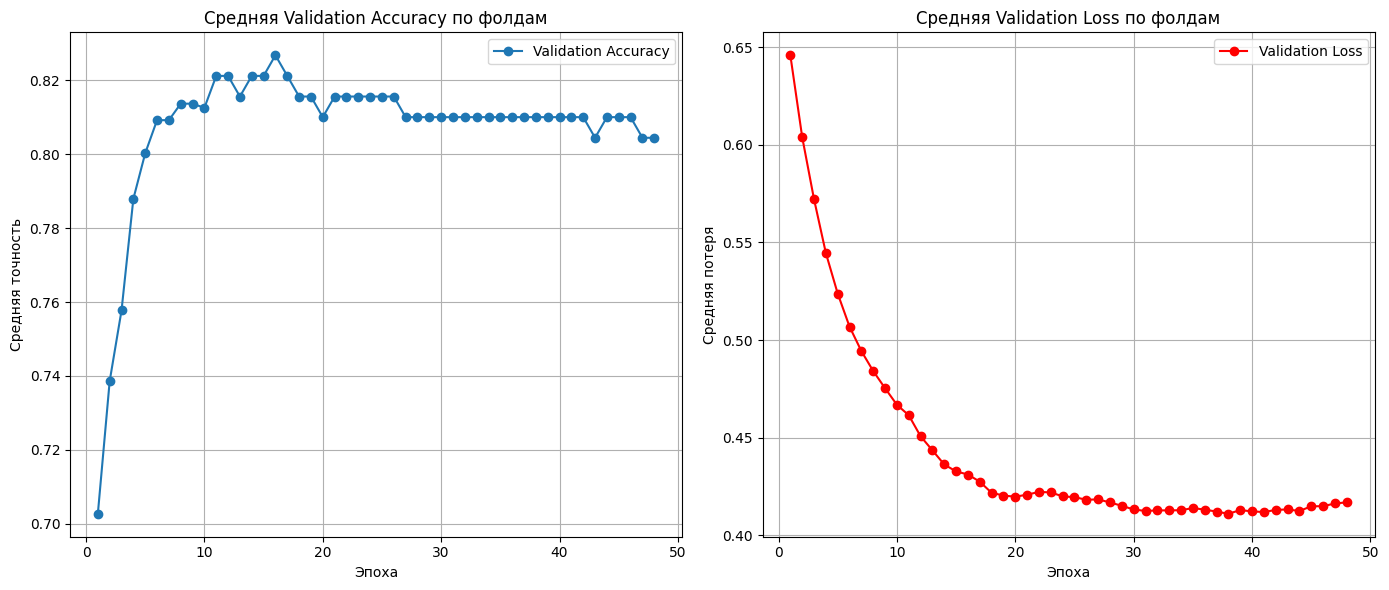

In [47]:
# Преобразование all_accuracies и all_losses в массивы одинаковой длины
max_length = max(len(acc) for acc in all_accuracies)  # Определяем максимальную длину последовательностей

# Дополняем последовательности до максимальной длины
padded_accuracies = np.array([np.pad(acc, (0, max_length - len(acc)), constant_values=np.nan) for acc in all_accuracies])
padded_losses = np.array([np.pad(loss, (0, max_length - len(loss)), constant_values=np.nan) for loss in all_losses])

# Средние значения для accuracy и loss, игнорируя NaN
mean_accuracy = np.nanmean(padded_accuracies, axis=0)
mean_loss = np.nanmean(padded_losses, axis=0)

# Построение графиков accuracy и loss
plt.figure(figsize=(14, 6))

# График accuracy
plt.subplot(1, 2, 1)
plt.plot(range(1, len(mean_accuracy) + 1), mean_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Эпоха')
plt.ylabel('Средняя точность')
plt.title('Средняя Validation Accuracy по фолдам')
plt.legend()
plt.grid(True)

# График loss
plt.subplot(1, 2, 2)
plt.plot(range(1, len(mean_loss) + 1), mean_loss, label='Validation Loss', color='red', marker='o')
plt.xlabel('Эпоха')
plt.ylabel('Средняя потеря')
plt.title('Средняя Validation Loss по фолдам')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


На графиках показаны средние значения точности (accuracy) и потерь (loss) на валидационных данных, рассчитанные по всем фолдам кросс-валидации для модели.

### Анализ производительности модели
1. **Точность на валидации**:
   - Видно, что точность модели стабилизируется на уровне около 80% уже после 10 эпох. Это говорит о том, что модель быстро достигает неплохих результатов, а продолжение обучения практически не улучшает метрику. График потерь также подтверждает это, так как снижение потерь становится менее заметным после 30 эпох.

2. **Потеря на валидации**:
   - ППотери на валидации постепенно снижаются на протяжении всего обучения, что показывает, что модель хорошо адаптируется к данным. Однако после определенного момента их значения тоже стабилизируются.

### Основные выводы
Хотя нейронная сеть показывает удовлетворительные результаты в плане точности и потерь, есть несколько факторов, которые ограничивают её эффективность в данной задаче:

1. **Маленький объём данных**:
   - Нейронные сети эффективны, когда объём данных большой. В данном случае, датасет "Титаник" недостаточно велик, чтобы модель могла извлечь сложные закономерности. Из-за этого нейронная сеть может быть избыточной для такой задачи.

2. **Классические алгоритмы**:
   - Проблему предсказания выживаемости на "Титанике" часто лучше решают традиционные методы машинного обучения, такие как RandomForest или Gradient Boosting. Эти алгоритмы проще и лучше подходят для небольших объёмов данных, а их настройка позволяет достичь более высокой точности при меньших затратах.

3. **Использование дополнительных данных**:
   - В решениях на основе этого датасета часто используют внешние источники данных и дополнительные признаки, например, социальные или экономические факторы. Это помогает улучшить точность моделей, не прибегая к сложным архитектурам нейронных сетей.

4. **Переобучение**:
   - Применение Batch Normalization и Dropout помогло модели избежать переобучения, что является плюсом. Однако этот подход не решает проблему нехватки данных и не даёт модели дополнительной информации.

### Заключение и рекомендации
Нейронная сеть в данном случае демонстрирует стабильные результаты, но из-за ограничений данных её потенциал не реализован полностью. Для задачи предсказания выживаемости на "Титанике" более эффективным решением будет использование классических методов, таких как RandomForest или Gradient Boosting. Эти алгоритмы проще и обеспечивают высокую точность на небольших наборах данных.

В будущем можно попробовать улучшить результаты за счёт настройки гиперпараметров классических моделей и добавления новых признаков из сторонних источников. Это, скорее всего, даст лучший результат, чем усложнение архитектуры нейронной сети.